<a href="https://colab.research.google.com/github/ruizleandro/Dataset-Cleaning-and-Analysis/blob/master/Data_Cleaning_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
__author__ = "Leandro Ruiz"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from google.colab import drive

/usr/local/lib/python3.6/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Entering the file directly from Drive:

In [0]:
drive.mount('/content/drive')
autofile = '/content/drive/My Drive/Datasets/cars.csv'
cars = pd.read_csv(autofile, header = None)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#Data Cleaning

Adding titles to the columns:

In [0]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
cars.columns = headers
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Replacing lost data with NaN, changing the type of data, eliminating the priceless rows and counting lost data by columns:

In [0]:
cars.replace("?", np.nan, inplace = True)

cars[['bore', 'stroke']] = cars[['bore', 'stroke']].astype(float)
cars[['normalized-losses']] = cars[['normalized-losses']].astype(float)
cars[['price']] = cars[['price']].astype(float)
cars[['peak-rpm']] = cars[['peak-rpm']].astype(float)
cars[['horsepower']] = cars[['horsepower']].astype(float)

cars.dropna(subset=['price'], axis = 0, inplace= True)
cars.reset_index(drop = True, inplace = True)
missing_data = cars.isnull()

for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print('')

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    164
True      37
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

fuel-type
False    201
Name: fuel-type, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    199
True       2
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
Fa

Replacing missing values:

In [0]:
avg_norm_losses = cars['normalized-losses'].astype(float).mean(axis = 0)
cars['normalized-losses'].replace(np.nan, avg_norm_losses, inplace = True)

avg_bore = cars['bore'].astype(float).mean(axis = 0)
cars['bore'].replace(np.nan, avg_bore, inplace = True)

avg_stroke = cars['stroke'].astype(float).mean(axis = 0)
cars['stroke'].replace(np.nan, avg_stroke, inplace = True)

avg_horsepower = cars['horsepower'].astype(float).mean(axis = 0)
cars['horsepower'].replace(np.nan, avg_horsepower, inplace = True)

cars['num-of-doors'].replace(np.nan, 'four', inplace = True)

In [0]:
cars.describe(include=[np.object])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,165,115,94,118,198,145,157,92


#Data Summarization

In [0]:
cars.dtypes

Correlation between variables:

In [0]:
cars[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001250,0.566838
stroke,-0.055390,1.000000,0.187854,0.097815
compression-ratio,0.001250,0.187854,1.000000,-0.214431
horsepower,0.566838,0.097815,-0.214431,1.000000


Graphic correlation using Seaborn:

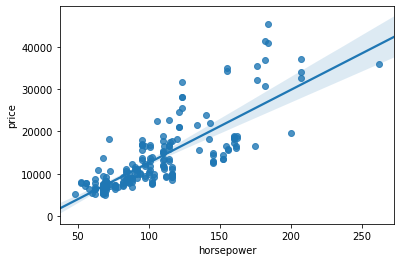

In [0]:
sns.regplot(x = 'horsepower', y = 'price', data = cars)

Subplot of categorical variables, ao we can see the outliers:

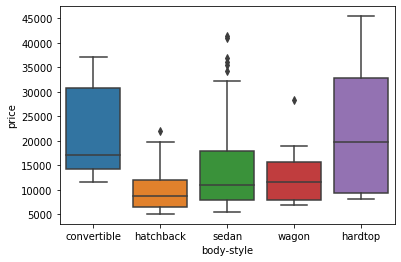

In [0]:
sns.boxplot(x="body-style", y="price", data = cars)

Counting values of an object type column:

In [0]:
drive_wheels_counts = cars['drive-wheels'].value_counts().to_frame()
# cambia el nombre de la columna a 'value_counts'
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
# cambia el nombre al indice
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


Using groupby() so we can see the average price according to the type of traction:

In [0]:
cars_group_one = cars[['drive-wheels','price']]
cars_group_one = cars_group_one.groupby(['drive-wheels'],as_index=False).mean()
cars_group_one 

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


Average price combining two variables:

In [0]:
cars_gptest = cars[['drive-wheels','body-style','price']]
grouped_test1 = cars_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Heatmap with the latest data:

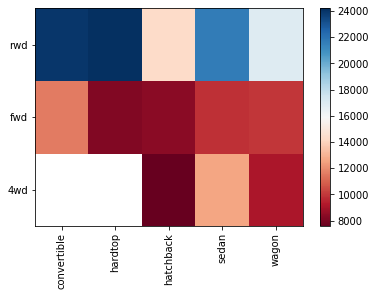

In [0]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

# nombre de etiquetas
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# mover marcas y etiquetas al medio
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# insertar etiquetas
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# rotar etiqueta si es muy larga
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

**P-VALUE (Pearson Correlation Coefficient)**

In [0]:
pearson_coef, p_value = stats.pearsonr(cars['wheel-base'], cars['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, 
      " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


**ANOVA (Analysis of Variation)**

In [0]:
grouped_test2 = cars_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])

f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], 
                              grouped_test2.get_group('rwd')['price'], 
                              grouped_test2.get_group('4wd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


#Model Development

Simple linear regression model:

In [0]:
lm = LinearRegression()
Z = cars[['horsepower', 'highway-mpg', 'engine-size']]

lm.fit(Z, cars['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
lm.intercept_

-2120.44439809749

In [0]:
lm.coef_

array([  41.29562215, -139.11073545,  120.79989543])

In [0]:
Yhat = lm.predict(Z)
Yhat[0:5]

array([14411.3662094 , 14411.3662094 , 18983.78639677, 11085.57559963,
       15996.90174784])

Regression plot between highway-mpg and price:

(0, 48259.15570764078)

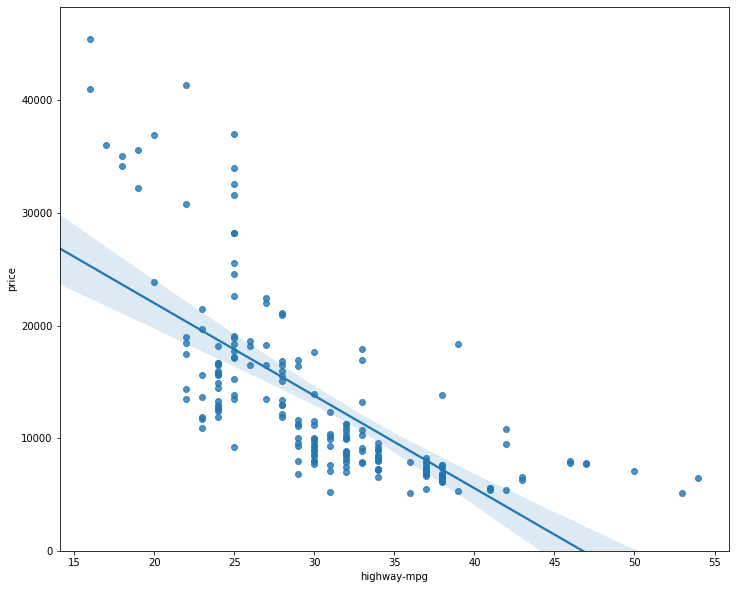

In [0]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x = "highway-mpg", y = "price", data = cars)
plt.ylim(0,)

Residual plot:

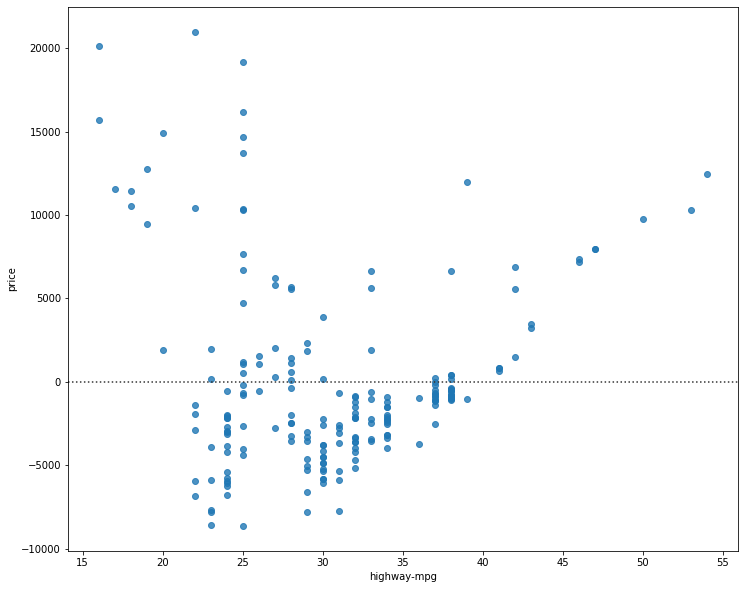

In [0]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(cars['highway-mpg'], cars['price'])
plt.show()

We can see that the residuals are not distributed randomly around the x-axis, which leads us to believe that perhaps a non-linear model is more appropriate for this data. See PlotPolly for the final results.

Graph comparing the predicted values with the real values:

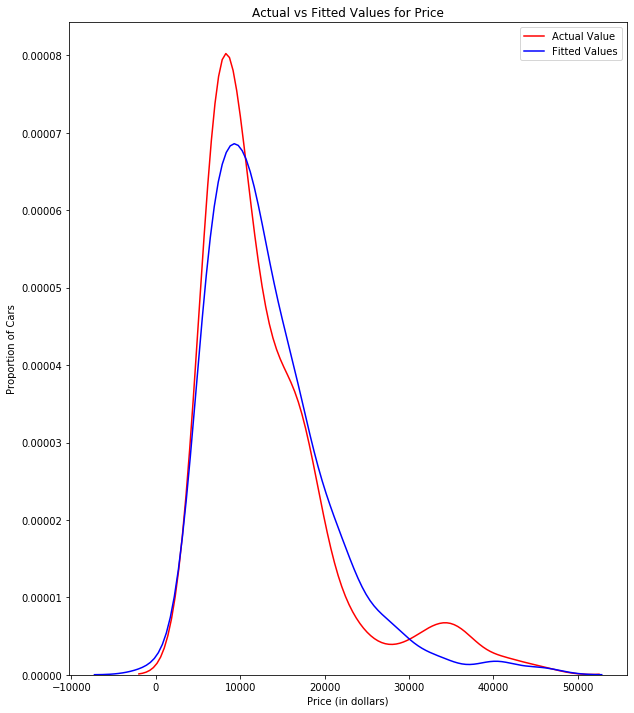

In [0]:
plt.figure(figsize = (10, 12))

ax1 = sns.distplot(cars['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Function that allows to create a polynomial regression with only four variables:

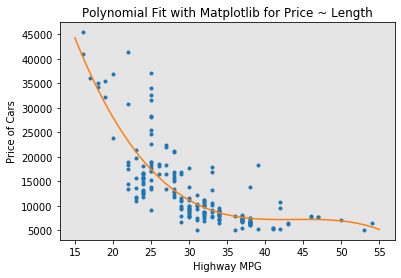

In [0]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

x = cars['highway-mpg']
y = cars['price']

f = np.polyfit(x, y, 3) # the polynomy will be of 3rd order
p = np.poly1d(f)

PlotPolly(p, x, y, 'Highway MPG')

Changing the polynomial to one of 11th order:



            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


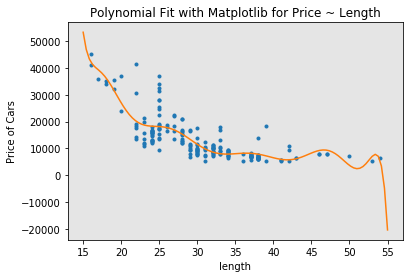

In [0]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1, x, y, 'length')

Pipelines:

In [0]:
Input = [('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [0]:
pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [0]:
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13660.53678232, 13660.53678232, 18263.39677072, 10063.02556929])

**Measuring accuracy**

R-squared (the highest the best):

In [0]:
# highway_mpg_fit
lm.fit(Z, y)
# Find the R^2
print('The R-square is: ', lm.score(Z, y))

The R-square is:  0.7921892042053713


Mean Squared Error (the lowest the best):

In [0]:
Yhat = lm.predict(Z)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [14411.3662094  14411.3662094  18983.78639677 11085.57559963]


In [0]:
mse = mean_squared_error(cars['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  13059174.36937809


#Model Evaluation

To evaluate the models you just have to use numerical data:

In [0]:
cars_numeric = cars._get_numeric_data()

In [0]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [0]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

The data is divided between those for training and testing.
The variable Y is the data to predict, in this case the price. And the variable X is the rest of the data.

In [0]:
y_data = cars['price']
x_data = cars.drop('price', axis = 1)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 31
number of training samples: 170


In [0]:
lre = LinearRegression()

lre.fit(x_train[["horsepower"]], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
lre.score(x_test[['horsepower']], y_test)

0.7077153381633063

In [0]:
lre.score(x_train[['horsepower']], y_train)

0.6451479282728708

Cross validation score:

In [0]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
Rcross

array([0.7747254 , 0.51722436, 0.74881624, 0.04792707])

In [0]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.5221732664777984 and the standard deviation is 0.29158341973020163


Negative squared error:

In [0]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20244958.23821451, 43740285.03051738, 12491753.70789968,
       17570582.82435501])

In [0]:
Rc = cross_val_score(lre, x_data[['horsepower']], y_data, cv = 2)
Rc

array([0.59031711, 0.4440862 ])

Prediction of the cross validation score:

In [0]:
from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14143.6442164 , 14143.6442164 , 20817.63619486, 12746.7621744 ,
       14764.48067952])

**MODEL SELECTION**

In [0]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([11926.19685763, 11236.66976109,  6436.60874025, 21893.14837306,
       16673.5683027 ])

In [0]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11350.25141342,  5914.92099894, 11242.40307372,  6661.79537475,
       15556.36838076])

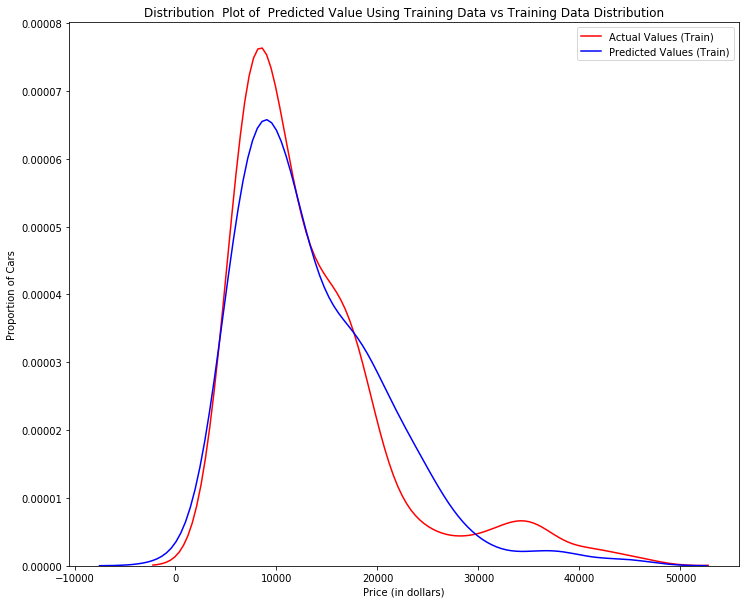

In [0]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Esto pasa cuando el grafico encuentra nueva data en el set de prueba, tiene muchos errores en las predicciones:

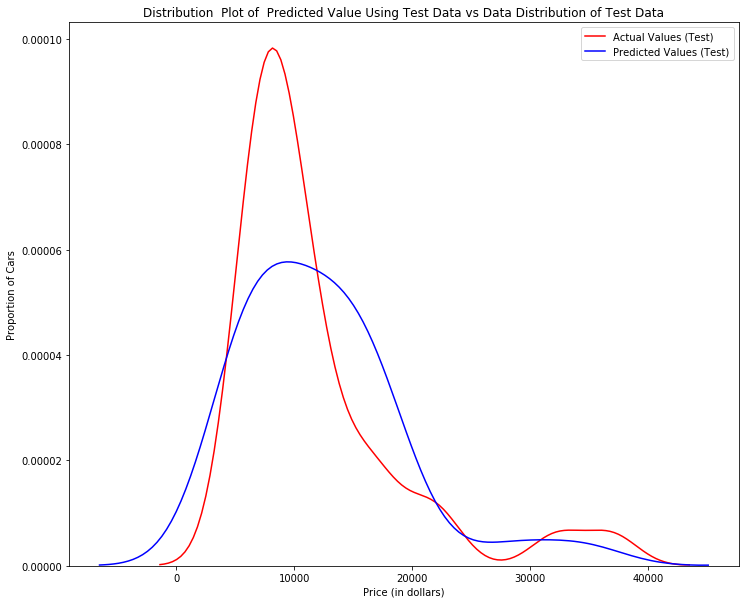

In [0]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

**Model overfitting**


Using the 55% of the data for testing:

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)


Create a 5th order polnomial with the "horsepower" variable:

In [0]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

Create a linear regression object:

In [0]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Make predictions:

In [0]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6724.76828468,  7303.51314872, 12213.8613518 , 18899.15291183,
       19998.93532683])

In [0]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6724.76828468  7303.51314872 12213.8613518  18899.15291183]
True values: [ 6295. 10698. 13860. 13499.]


Plot the model performance:

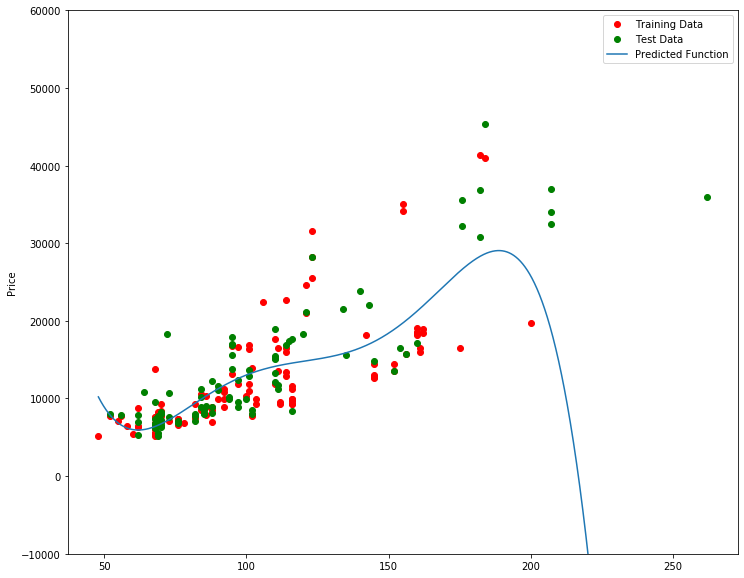

In [0]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

Evaluate the model:

In [0]:
poly.score(x_train_pr, y_train)

0.5570463604074032

In [0]:
poly.score(x_test_pr, y_test) # A negative R^2 means overfitting

-29.695404358942334

Graph to see how R ^ 2 changes according to the order of the polynomial:

Text(3, 0.75, 'Maximum R^2 ')

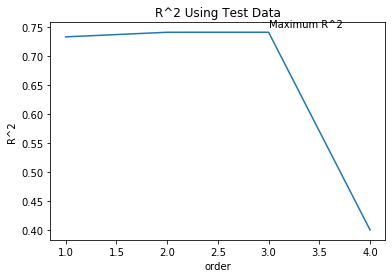

In [0]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')   

Interactive graph to see how R ^ 2 performs according to the amount of data for testing and training and the order of the polynomial:

In [0]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [0]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f>